# Fashion MNIST dataset preparation

In [ ]:
from ising import IsingDeNoise
import matplotlib.cm as cm
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/fashion-mnist_test.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.drop(columns=['label'], inplace=True)
df = df.values.reshape(-1, 28, 28)

In [5]:
df.shape

(10000, 28, 28)

In [6]:
df_binary = np.where(df < 128, -1, 1)

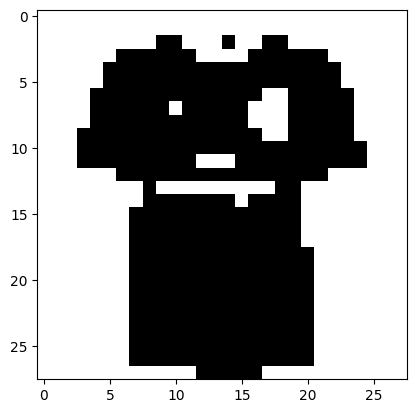

In [7]:
plt.imshow(df_binary[0], cmap='binary')

## Creating noisy and cleaned datasets

In [ ]:
def create_noisy_image(Z, q=0.9):
    noise = np.random.random(size = Z.size).reshape(Z.shape) > q
    noisy = np.array(Z)
    noisy[noise] = -noisy[noise]
    return noisy

def denoise_image(Z, q=0.9):
    im = IsingDeNoise(Z, q)
    im[im >= 0] = 1
    im[im < 0] = -1
    return im

In [ ]:
noisy_images = np.array([create_noisy_image(img) for img in df_binary])

# Load the noisy images from a file 
# noisy_images = np.load("data/noisy_images_fashion_mnist.npy")

In [ ]:
clean_images = []
for i, image in enumerate(noisy_images):
    print(f"Processing {i} image...")
    clean_image = denoise_image(image)
    clean_images.append(clean_image)

Processing 0 image...
Processing 1 image...
Processing 2 image...
Processing 3 image...
Processing 4 image...
Processing 5 image...
Processing 6 image...
Processing 7 image...
Processing 8 image...
Processing 9 image...
Processing 10 image...
Processing 11 image...
Processing 12 image...
Processing 13 image...
Processing 14 image...
Processing 15 image...
Processing 16 image...
Processing 17 image...
Processing 18 image...
Processing 19 image...
Processing 20 image...
Processing 21 image...
Processing 22 image...
Processing 23 image...
Processing 24 image...
Processing 25 image...
Processing 26 image...
Processing 27 image...
Processing 28 image...
Processing 29 image...
Processing 30 image...
Processing 31 image...
Processing 32 image...
Processing 33 image...
Processing 34 image...
Processing 35 image...
Processing 36 image...
Processing 37 image...
Processing 38 image...
Processing 39 image...
Processing 40 image...
Processing 41 image...
Processing 42 image...
Processing 43 image..

In [ ]:
# np.save("data/noisy_images_fashion_mnist.npy", noisy_images)
# np.save("data/fashion_mnist_denoised.npy", clean_images)